# Importing Python Packages

In [1]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [20]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Participants\\')

In [37]:
# filenames
excel_names = ["2013-2017 Bike MS Participants.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
participants = pd.concat(frames)

# Check headers
participants.head(3)

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,Address - Participant City,Address - Participant ZIP/Postal Code,Registration Type,Event ID,Participant Gender,Participant Goal($),Suggested Participant Goal($),Source Code Type,Source Code Text,Sub Source Code Text
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,Littleton,80122,Online,27037,Female,1095.0,1095.0,NaN,NaN,NaN
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,Berkeley,94705,Online,28894,Female,1500.0,1100.0,NaN,NaN,NaN
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,Parker,80138,Online,25572,Male,1075.0,1075.0,6,www.google.com,NaN


In [5]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [6]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies and Cleaning Addresses

In [7]:
# List of all headers
# participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']]

In [8]:
# counting zero values
print((participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']] == 0).sum())


Security Category Name                        0
Fiscal Year                                   0
Internal Event Name                           0
Event Date                                    0
Participation Type Name                       0
Team Name                                     0
Team Creation Date                            0
Team Division                                 0
Team ID                                       0
Contact ID                                    0
Member ID                                     0
Participant Accept Email                  21551
Registration Date                             0
Registration Active Status                    0
Is Team Captain                           59304
Is Secondary Registration                 65051
Is Prior Participant                          0
Emails Sent                               40802
Total of All Confirmed Gifts($)           10324
Total From Participant($)                 30001
Total Not From Participant($)           

In [9]:
# Counting missing values
participantsnull=(participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']])

print(participantsnull.isnull().sum())

Security Category Name                        0
Fiscal Year                                   0
Internal Event Name                           0
Event Date                                    0
Participation Type Name                       0
Team Name                                 11509
Team Creation Date                        11509
Team Division                             12209
Team ID                                   11509
Contact ID                                    0
Member ID                                    74
Participant Accept Email                      0
Registration Date                             0
Registration Active Status                    0
Is Team Captain                               0
Is Secondary Registration                     0
Is Prior Participant                          0
Emails Sent                                   0
Total of All Confirmed Gifts($)               0
Total From Participant($)                     0
Total Not From Participant($)           

In [10]:
#compute count of values in columns
participants['Registration Type'].value_counts()


Online     57666
Offline     7833
Name: Registration Type, dtype: int64

In [11]:
#compute count of values in columns
participants['Participant Gender'].value_counts()


Male      40478
Female    24130
Name: Participant Gender, dtype: int64

In [12]:
#compute count of values in columns
participants['Participation Type Name'].value_counts()

Cyclist                                                          22916
Two-Day Participant                                               8875
Cyclist No Bus                                                    3753
$75 Cyclist Registration, No Coach needed on Sunday               2622
Two Day Cyclist                                                   2389
Two-day Cyclist                                                   2108
Event Participant                                                 1960
$60 Cyclist Registration, No Coach needed on Sunday               1652
Participant - No Bus                                              1399
Cyclist w/ Sunday PM Bus                                          1330
Cyclist - No Bus                                                  1228
166 miles                                                          958
Virtual Cyclist                                                    937
Cyclist Registration (no transportation needed on Sunday)          866
$95 Cy

In [13]:
#compute count of values in columns
participants['Is Prior Participant'].value_counts()

No     34177
Yes    31322
Name: Is Prior Participant, dtype: int64

In [14]:
#compute count of values in columns
participants['Participant Email Status'].value_counts()

Good                 57899
Unknown               3047
Bad (Hard Bounce)     2911
Bad (Soft Bounce)     1587
Name: Participant Email Status, dtype: int64

In [15]:
#compute count of values in columns
participants['Participant Employer'].value_counts()


# initial results yielded numerous years, social security numbers, and obvious space filler entries. These were deleted.

# Other data entry errors were identified and corrected, such as "AT&T", "A   T&T" and anyone who indicated retired from a firm was changed to retired.
# If in doubt, nothing was changed

Self Employed                              1381
Retired                                     864
Salesforce                                  227
Google                                      212
Wells Fargo                                 201
IHS                                         185
Salesforce.com                              176
National MS Society                         166
Deloitte                                    153
Johns Manville                              149
Intuit                                      139
Student                                     126
None                                        117
Kaiser Permanente                           110
Wescom Credit Union                         109
Chevron                                      91
PwC                                          89
Gartner                                      88
Southern California Edison Company           88
Bank of America                              83
Charles Schwab                          

In [16]:
#compute count of values in columns
participants['Participant Occupation'].value_counts()


Healthcare                               2315
Engineering                              2225
Information Technology (IT)              1718
Sales                                    1442
Executive/Management                     1224
Education and Training                   1199
Consulting                                844
Banking and Financial Services            828
Accounting                                814
Legal and Paralegal                       708
Marketing                                 606
Construction and Landscaping              526
Student                                   505
Real Estate, Rental, and Leasing          496
Administrative, Support, and Clerical     475
Science and Biotechnology                 378
Government                                357
Insurance                                 347
Manufacturing                             341
Retail/Wholesale                          336
Skilled Work and Trades                   329
Nonprofit                         

In [17]:
#compute count of values in columns
participants['Address  -  Participant City'].value_counts()






Denver                       3194
San Francisco                2315
San Diego                    1300
Littleton                    1105
Wilmington                    966
Los Angeles                   897
Jacksonville                  779
Lakewood                      693
Fort Collins                  626
Centennial                    575
Boulder                       570
Arvada                        567
Phoenix                       533
Aurora                        519
Tampa                         494
Oakland                       489
Orlando                       488
San Jose                      488
Newark                        487
Highlands Ranch               484
Birmingham                    473
Golden                        454
Parker                        424
Irvine                        407
Huntington Beach              362
Las Vegas                     352
Longmont                      349
Long Beach                    343
Westminster                   343
Englewood     

In [18]:
#describe zip code for errors
participants['Address -  Participant ZIP/Postal Code'].describe()

# the zero evalue entries were all intenational. 

count     65478
unique     5554
top       80127
freq        385
Name: Address -  Participant ZIP/Postal Code, dtype: int64

# Data Analysis

In [ ]:
# List of all headers
# participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']]

Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Connection to MS and Participant State/Province')

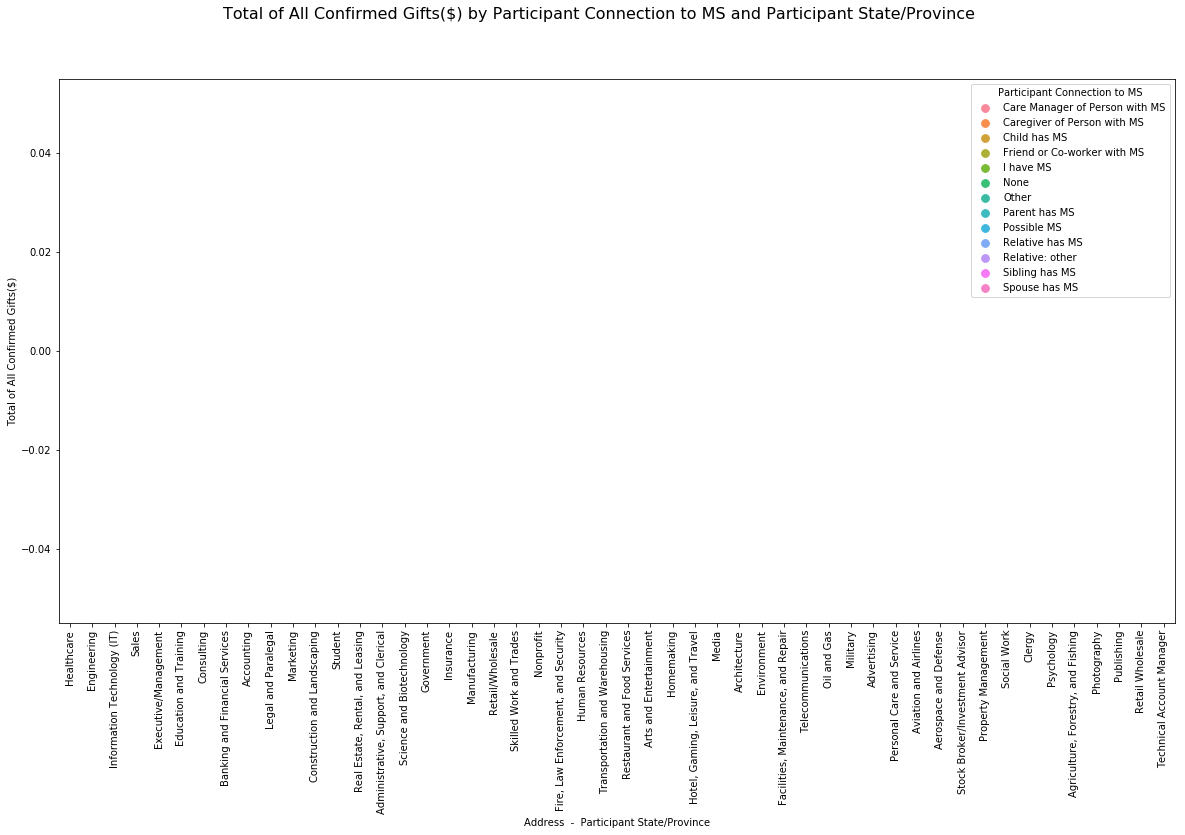

In [44]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Address  -  Participant State/Province', y="Total of All Confirmed Gifts($)", hue="Participant Connection to MS",data=participants, order = participants['Participant Occupation'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Connection to MS and Participant State/Province', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Connection to MS and Team Division')

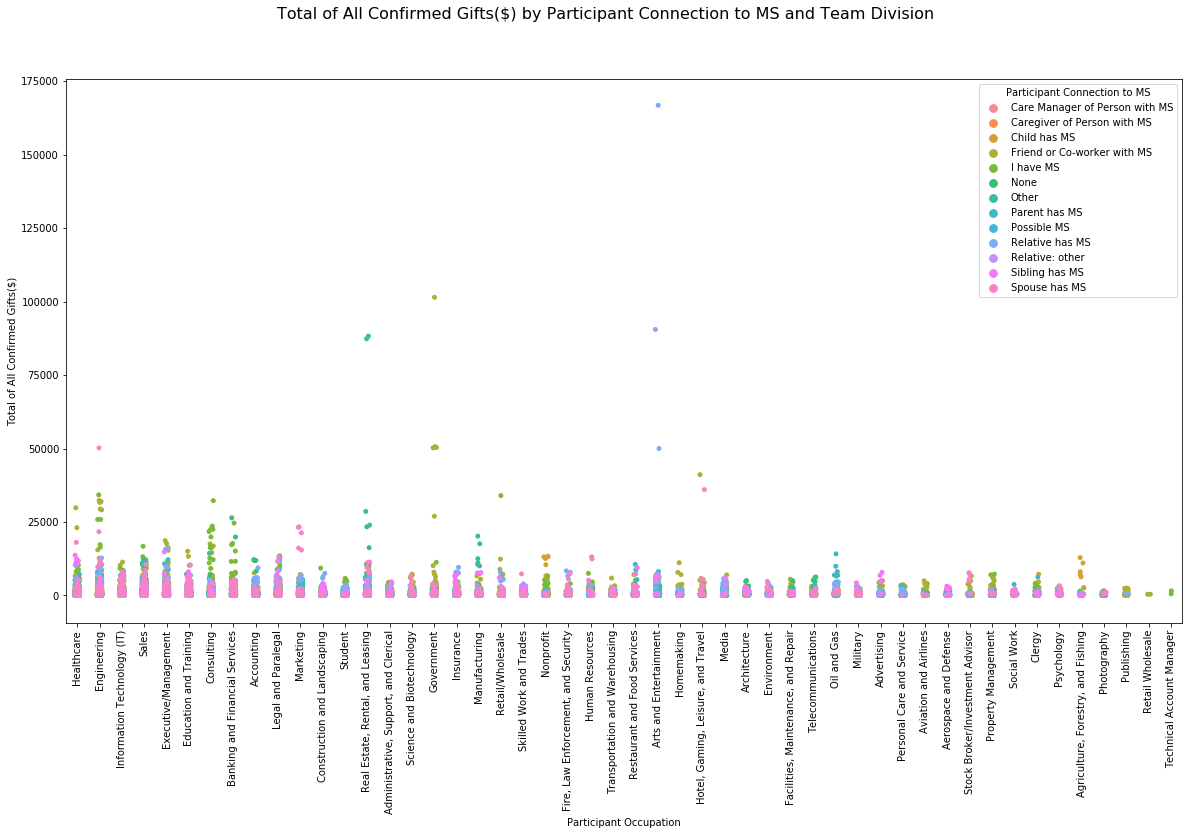

In [38]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Occupation', y="Total of All Confirmed Gifts($)", hue="Participant Connection to MS",data=participants, order = participants['Participant Occupation'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Connection to MS and Team Division', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Participant Occupation (Top 50) and Team Division')

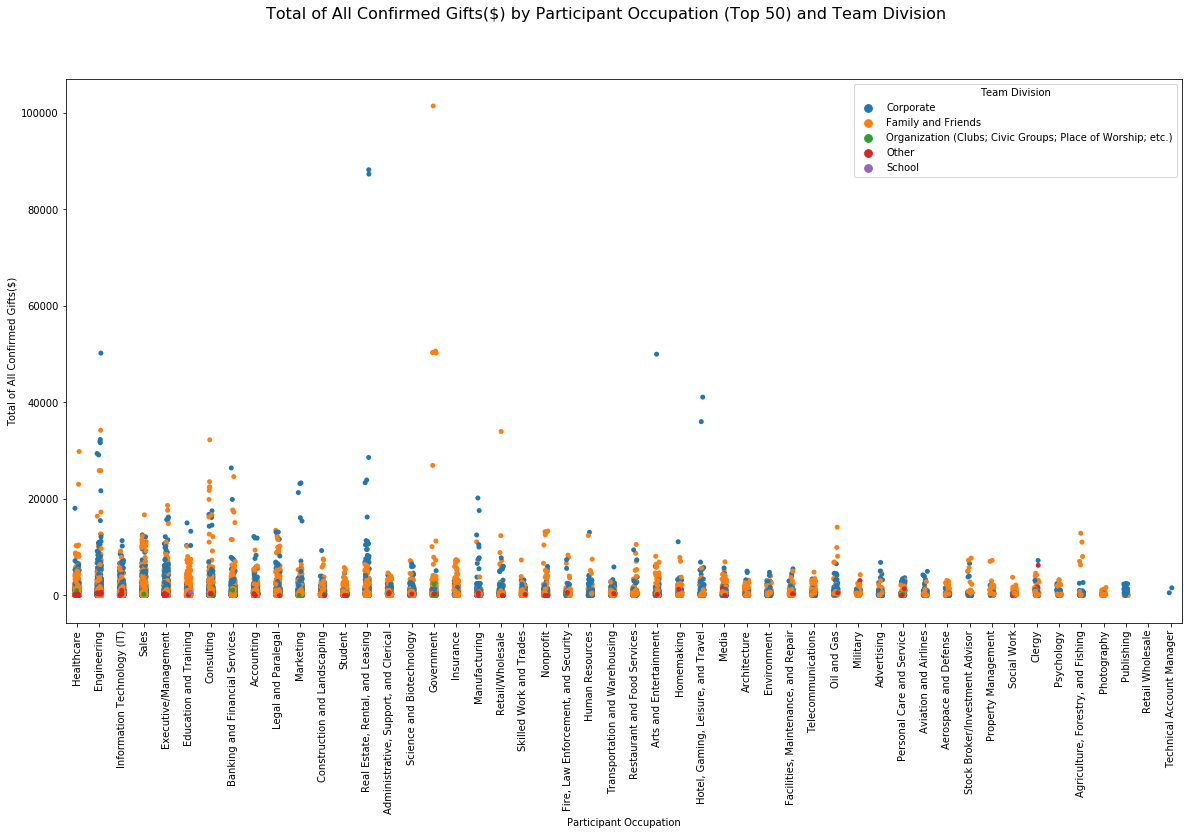

In [39]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Occupation', y="Total of All Confirmed Gifts($)", hue="Team Division",data=participants, order = participants['Participant Occupation'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Participant Occupation (Top 50) and Team Division', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Gender and Team Division')

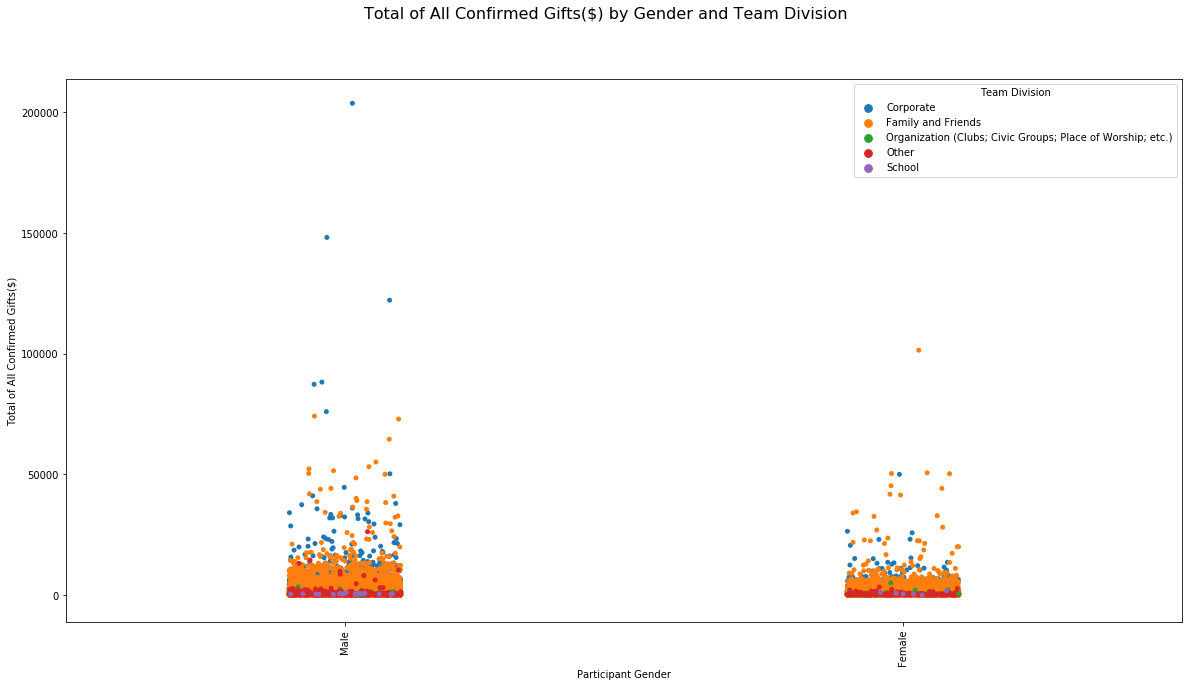

In [32]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total of All Confirmed Gifts($)", hue="Team Division",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Gender and Team Division', fontsize=16)



Text(0.5,0.98,'Total From Participant($) by Gender and Team Division')

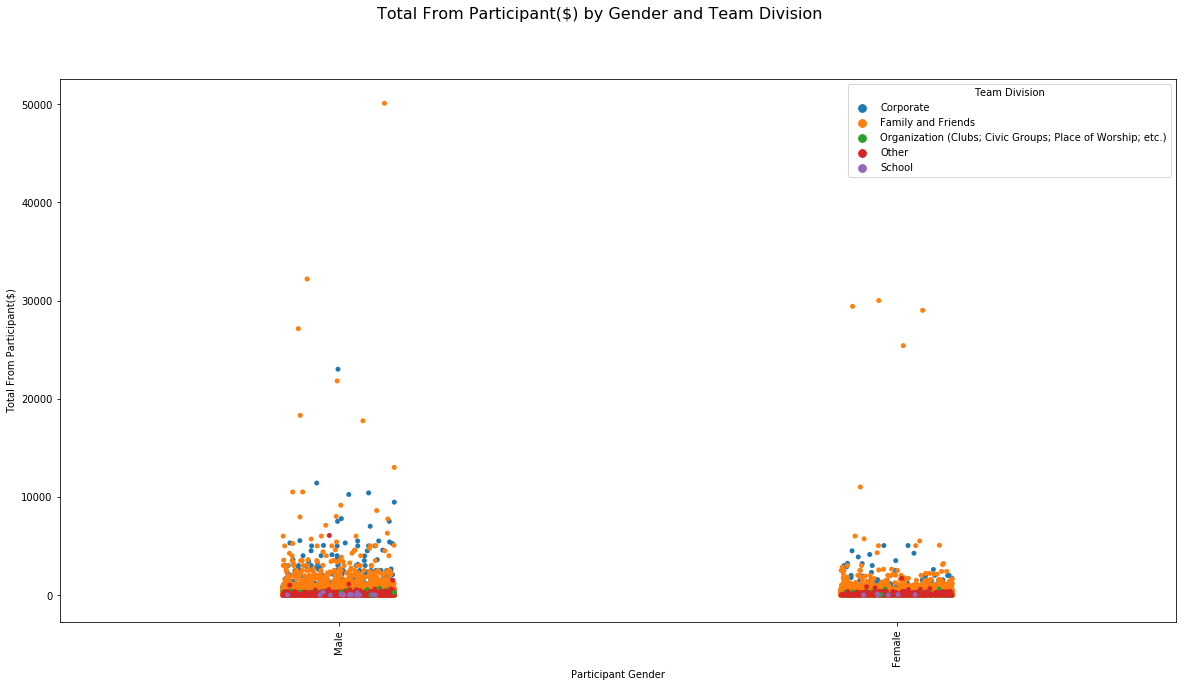

In [33]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total From Participant($)", hue="Team Division",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total From Participant($) by Gender and Team Division', fontsize=16)



Text(0.5,0.98,'Total From Participant($) by Gender and Past Participation')

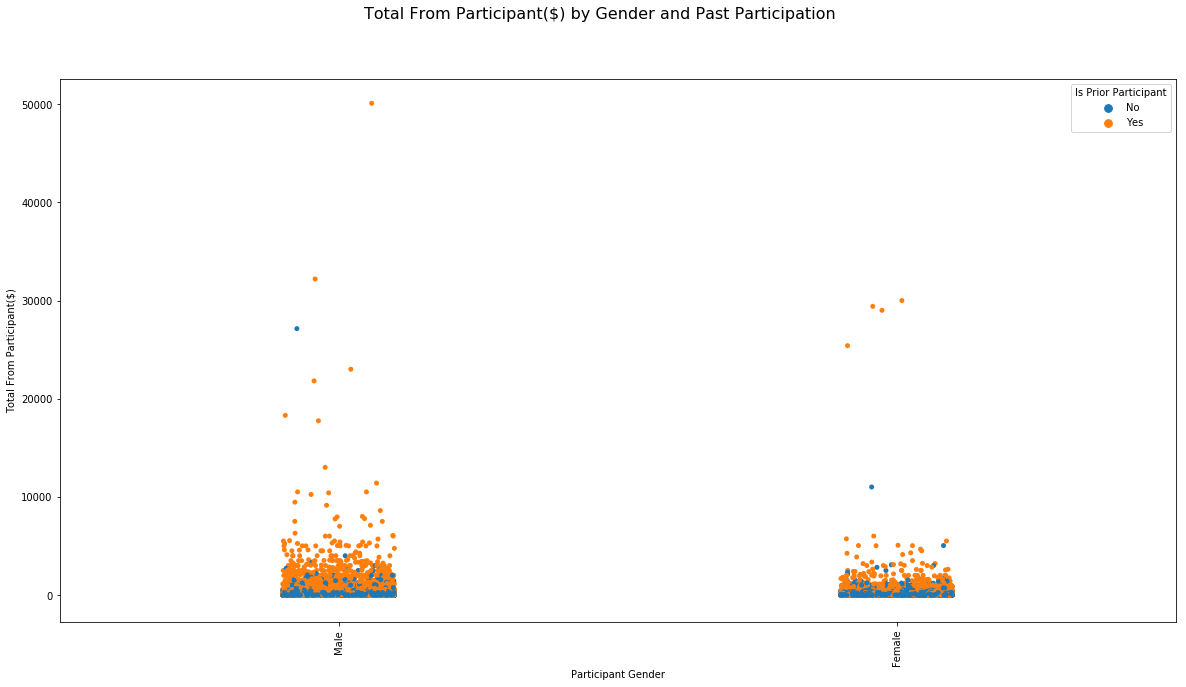

In [21]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total From Participant($)", hue="Is Prior Participant",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total From Participant($) by Gender and Past Participation', fontsize=16)



Text(0.5,0.98,'Total of All Confirmed Gifts($) by Gender and Past Participation')

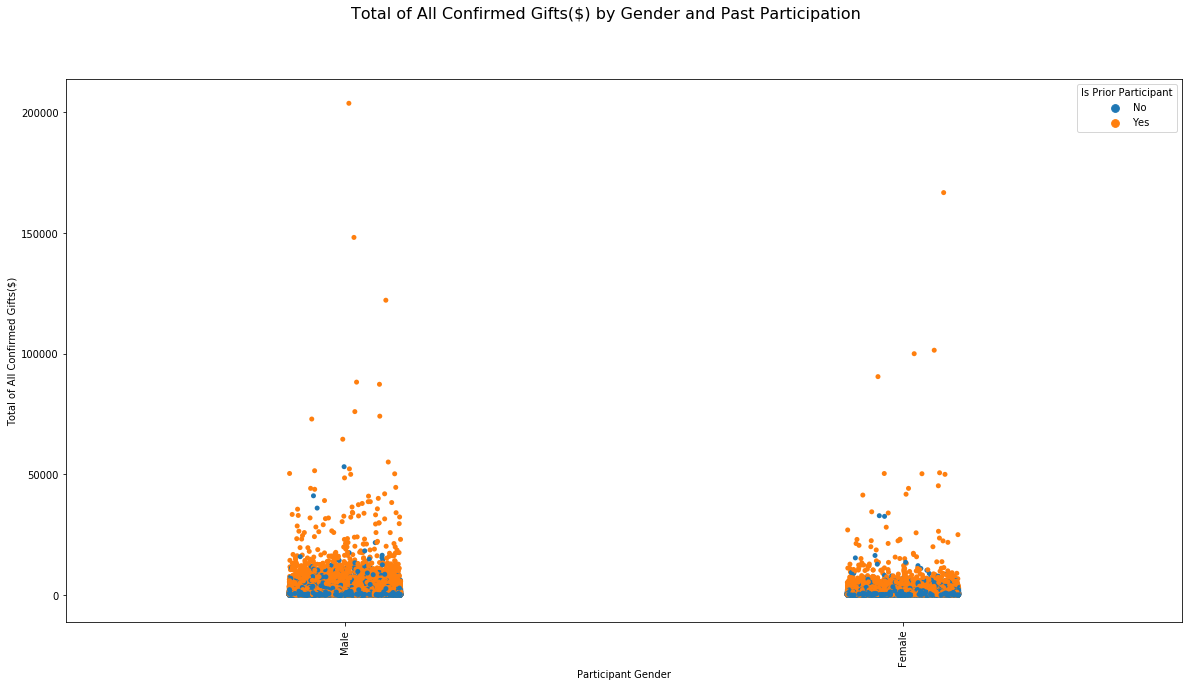

In [22]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Participant Gender', y="Total of All Confirmed Gifts($)", hue="Is Prior Participant",data=participants, order = participants['Participant Gender'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total of All Confirmed Gifts($) by Gender and Past Participation', fontsize=16)



# Describing Data

In [41]:
dummy = pd.get_dummies(participants['Participant Gender'])
participantsd = pd.concat([participants, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,Registration Type,Event ID,Participant Gender,Participant Goal($),Suggested Participant Goal($),Source Code Type,Source Code Text,Sub Source Code Text,Female,Male
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,Online,27037,Female,1095.0,1095.0,NaN,NaN,NaN,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,Online,28894,Female,1500.0,1100.0,NaN,NaN,NaN,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,Online,25572,Male,1075.0,1075.0,6,www.google.com,NaN,0,1
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,Online,28914,Male,500.0,1075.0,NaN,NaN,NaN,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,Online,20901,Female,2000.0,1075.0,NaN,NaN,NaN,1,0


In [42]:
dummy = pd.get_dummies(participants['Team Division'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,Source Code Type,Source Code Text,Sub Source Code Text,Female,Male,Corporate,Family and Friends,Organization (Clubs; Civic Groups; Place of Worship; etc.),Other,School
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,NaN,NaN,NaN,1,0,1,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,NaN,NaN,NaN,1,0,1,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,6,www.google.com,NaN,0,1,1,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,NaN,NaN,NaN,0,1,1,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,NaN,NaN,NaN,1,0,0,1,0,0,0


In [45]:
dummy = pd.get_dummies(participants['Team Division'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,Stock Broker/Investment Advisor,Student,Technical Account Manager,Telecommunications,Transportation and Warehousing,Corporate,Family and Friends,Organization (Clubs; Civic Groups; Place of Worship; etc.),Other,School
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,0,0,0,0,0,1,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,0,0,0,0,0,1,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,0,0,0,0,0,1,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,0,0,0,0,0,1,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,0,0,0,0,0,0,1,0,0,0


In [46]:
dummy = pd.get_dummies(participants['Participant Occupation'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,Retired,Sales,Science and Biotechnology,Skilled Work and Trades,Social Work,Stock Broker/Investment Advisor,Student,Technical Account Manager,Telecommunications,Transportation and Warehousing
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,0,0,0,0,0,0,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,0,0,0,0,0,0,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dummy = pd.get_dummies(participants['Participant Connection to MS'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,Friend or Co-worker with MS,I have MS,None,Other,Parent has MS,Possible MS,Relative has MS,Relative: other,Sibling has MS,Spouse has MS
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,0,0,0,0,0,0,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,0,0,0,0,0,0,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dummy = pd.get_dummies(participants['Address  -  Participant State/Province'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,0,0,0,0,0,0,0,0,0,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,0,0,0,0,0,0,0,0,0,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dummy = pd.get_dummies(participants['Is Prior Participant'])
participantsd = pd.concat([participantsd, dummy],axis=1)
participantsd.head()

,Security Category Name,Fiscal Year,Internal Event Name,Event Date,Participation Type Name,Team Name,Team Creation Date,Team Division,Team ID,Contact ID,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
0,COC Bike Events,2016,COC 2016 Bike MS: Colorado,2016-06-25 11:08:00,Two Day Cyclist,Vivage Senior Living,2016-01-12 16:01:00,Corporate,463532.0,14947583,...,0,0,0,0,0,0,0,0,1,0
1,CAN Bike Events,2017,CAN 2017 Bike MS: Waves to Wine Ride,2017-09-23 11:14:00,Cyclist,Team Topel & DiStasi Wealth Management,2017-05-12 18:02:00,Corporate,529984.0,16157625,...,0,0,0,0,0,0,0,0,1,0
2,COC Bike Events,2015,COC 2015 Bike MS: Colorado,2015-06-27 13:42:00,Two-Day Participant,Anadarko Petroleum Corp,2015-01-28 10:15:00,Corporate,419287.0,13835815,...,0,0,0,0,0,0,0,0,1,0
3,COC Bike Events,2017,COC 2017 Bike MS Colorado,2017-06-24 13:40:00,Two-day Cyclist,Team Left Hand,2016-11-18 11:35:00,Corporate,499968.0,13835815,...,0,0,0,0,0,0,0,0,0,1
4,COC Bike Events,2013,Colorado - Bike MS 2013,2013-06-29 12:00:00,Two-Day Participant,RawHinies,2012-12-04 17:10:00,Family and Friends,314816.0,9029853,...,0,0,0,0,0,0,0,0,0,1


In [50]:
participantsd.describe()

,Fiscal Year,Team ID,Contact ID,Emails Sent,Total of All Confirmed Gifts($),Total From Participant($),Total Not From Participant($),Number From Participant,Number Not From Participant,Event ID,...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
count,65499.000000,53990.00000,6.549900e+04,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,...,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000
mean,2014.810165,399381.94349,1.043183e+07,32.358143,856.559061,127.000670,748.675758,0.775752,7.686362,24217.106551,...,0.002351,0.020626,0.000015,0.000336,0.004519,0.001069,0.000198,0.009099,0.521794,0.478206
std,1.377881,65332.18553,4.186126e+06,269.046299,2490.747586,492.649481,2403.297757,1.089874,12.260705,3045.772863,...,0.048432,0.142131,0.003907,0.018324,0.067073,0.032674,0.014087,0.094956,0.499529,0.499529
min,2013.000000,266665.00000,1.566055e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,348060.00000,7.681859e+06,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,21507.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,401596.00000,1.163842e+07,0.000000,400.000000,35.000000,340.000000,1.000000,4.000000,24022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,456011.00000,1.366256e+07,6.000000,800.000000,150.000000,701.000000,1.000000,10.000000,27037.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2017.000000,534794.00000,1.636498e+07,27354.000000,203791.000000,50093.000000,203791.000000,53.000000,552.000000,29050.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# counting 1 values

print((participants[['Security Category Name','Fiscal Year','Internal Event Name','Event Date','Participation Type Name','Team Name','Team Creation Date','Team Division','Team ID','Contact ID','Member ID','Participant Accept Email','Registration Date','Registration Active Status','Is Team Captain','Is Secondary Registration','Is Prior Participant','Emails Sent','Total of All Confirmed Gifts($)','Total From Participant($)','Total Not From Participant($)','Number From Participant','Number Not From Participant','Participant Email Status','Participant Employer','Participant Occupation','Participant Connection to MS','Address  -  Participant State/Province','Address  -  Participant County','Address  -  Participant City','Address -  Participant ZIP/Postal Code','Registration Type','Event ID','Participant Gender','Participant Goal($)','Suggested Participant Goal($)','Source Code Type','Source Code Text','Sub Source Code Text']] == 1).sum())


Security Category Name                        0
Fiscal Year                                   0
Internal Event Name                           0
Event Date                                    0
Participation Type Name                       0
Team Name                                     0
Team Creation Date                            0
Team Division                                 0
Team ID                                       0
Contact ID                                    0
Member ID                                     0
Participant Accept Email                  43948
Registration Date                             0
Registration Active Status                    0
Is Team Captain                            6195
Is Secondary Registration                   448
Is Prior Participant                          0
Emails Sent                                3138
Total of All Confirmed Gifts($)               2
Total From Participant($)                     6
Total Not From Participant($)           

In [51]:
participantsd.corr()


,Fiscal Year,Team ID,Contact ID,Participant Accept Email,Is Team Captain,Is Secondary Registration,Emails Sent,Total of All Confirmed Gifts($),Total From Participant($),Total Not From Participant($),...,UT,VA,VI,VT,WA,WI,WV,WY,No,Yes
Fiscal Year,1.000000,0.955041,0.231679,0.108476,0.003712,-0.087110,0.011219,0.016932,0.017816,0.013913,...,0.000511,-0.081666,-0.005133,-0.013197,-0.006411,-0.006685,-0.001992,-0.000684,-0.013553,0.013553
Team ID,0.955041,1.000000,0.252312,0.103200,0.027911,-0.069718,0.000393,-0.001453,0.009396,-0.004899,...,0.000115,-0.061146,-0.005812,-0.012152,-0.006960,-0.008365,-0.000200,0.007049,0.029340,-0.029340
Contact ID,0.231679,0.252312,1.000000,0.025770,-0.124636,0.008964,-0.061308,-0.122563,-0.065176,-0.117525,...,0.002440,-0.024725,0.001261,0.003168,-0.003264,-0.001041,-0.000340,-0.008354,0.323271,-0.323271
Participant Accept Email,0.108476,0.103200,0.025770,1.000000,0.051780,-0.032957,0.024885,0.047482,0.016954,0.047324,...,-0.010285,-0.020229,-0.005580,0.000423,-0.010468,-0.012896,-0.006280,0.010643,-0.066793,0.066793
Is Team Captain,0.003712,0.027911,-0.124636,0.051780,1.000000,-0.024290,0.062004,0.131674,0.051487,0.130059,...,-0.001686,0.004119,-0.001263,-0.005924,0.000003,-0.004185,-0.004554,0.020675,-0.108884,0.108884
Is Secondary Registration,-0.087110,-0.069718,0.008964,-0.032957,-0.024290,1.000000,-0.008902,-0.021196,-0.015913,-0.019292,...,-0.000204,0.003596,-0.000324,-0.001521,-0.005591,-0.002714,-0.001169,-0.007952,0.021967,-0.021967
Emails Sent,0.011219,0.000393,-0.061308,0.024885,0.062004,-0.008902,1.000000,0.102249,0.013811,0.104907,...,-0.004410,0.000490,-0.000470,-0.001972,-0.004344,0.001264,-0.001485,-0.006080,-0.070429,0.070429
Total of All Confirmed Gifts($),0.016932,-0.001453,-0.122563,0.047482,0.131674,-0.021196,0.102249,1.000000,0.362672,0.975549,...,-0.000049,0.006933,-0.000952,-0.003440,-0.001249,-0.003414,-0.001969,0.045579,-0.140899,0.140899
Total From Participant($),0.017816,0.009396,-0.065176,0.016954,0.051487,-0.015913,0.013811,0.362672,1.000000,0.176060,...,0.000494,0.010804,0.000976,-0.000467,-0.001735,-0.001441,-0.002697,0.002723,-0.076087,0.076087
Total Not From Participant($),0.013913,-0.004899,-0.117525,0.047324,0.130059,-0.019292,0.104907,0.975549,0.176060,1.000000,...,-0.000263,0.004295,-0.001217,-0.003615,-0.000912,-0.003391,-0.001600,0.046841,-0.134595,0.134595


# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics